# Mount my Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Read a file from the Week01 PGSS2023 class folder

In [4]:
# /content/gdrive/MyDrive/PGSS2022/PGSS2023/Week01/iris.csv

import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week01/iris.csv", header=None)
df.columns = ["Petal.Length", "Petal.Width", "Sepal.Length", "Sepal.Width", "Species"]
df

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: xlabel='Sepal.Length', ylabel='Species'>

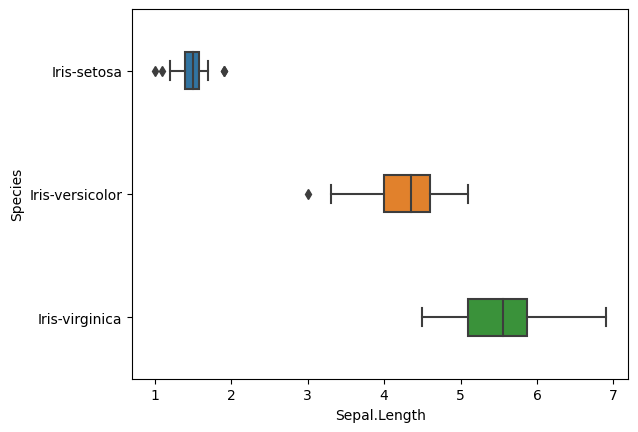

In [19]:
# Create a boxplot to describe the average sepal length of each species of iris
from matplotlib import pyplot as plt
import seaborn as sns
# sns.barplot(x="Species", y="Sepal.Length", data=iris_df)

sns.boxplot(y="Species", x="Sepal.Length", data=df, width=0.3)



# Run some R code inside Colab

In [20]:
%load_ext rpy2.ipython

In [25]:
%%R
library(readr)
iris <- read_csv("/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week01/iris.csv") #,
                 #col_names = FALSE, col_types = cols(X1 = col_double()))
# colnames(iris) <- c("Petal.Length", "Petal.Width", "Sepal.Length", "Sepal.Width", "Species")
# View(iris)

# iris$Species <- as.factor(iris$Species)
# sapply(iris, class)

# table(iris$Species)

NotImplementedError: ignored

# Lets try to read in some data from Google Sheets

In [6]:
# https://docs.google.com/spreadsheets/d/1VK-Zs72ebK6ddwvDYFN2cA04PDTbVLXJeylmdJ7OxkM/edit#gid=0

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('PGSS2023').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

[['First Name', 'Last Name', 'Andrew ID', 'Github', 'Role', '', 'Non-Andrew Email', 'Height'], ['Parth', 'Parikh', 'pcparikh', 'ParthParikh04', 'Student', '', 'parthparikh04@gmail.com', '5\'6"'], ['Sooraj', 'Tharumia', 'stharumi', 'SoorajTharumia', 'Student', '', 'sendsooraj@gmail.com', '5\'5"'], ['Yeana', 'Kim', 'ygkim', '', 'Student', '', 'pkyeanakim@gmail.com', '5\'1"'], ['Darren ', 'Wang', 'darrenwa', 'DPnimo11', 'Student', '', 'dpnimo11@gmail.com', '5\'8"'], ['Felix', 'Yang', 'fsyang', 'fsyang05', 'Student', '', 'fsyang05@gmail.com', "5'8"], ['Helen', 'Mao', 'hmao2', 'SavagePancake', 'Student', '', 'helenmao2006@gmail.com', "5'2"], ['Ben', 'Nguyen', 'aqnguyen', 'BenjieN07', 'student', '', 'nguyenquangduyan.us@gmail.com', '5\'7"'], ['Edward', 'Mei', 'emei2', 'cmuedmei', 'Student', '', 'meis201601@gmail.com', "5'8''"], ['Jonathan', 'Barsotti', 'jbarsott', 'bwitishjack', 'Student', '', 'jackbarsotti06@gmail.com', '5\'11"'], ['Lihini', 'Ranaweera', 'lranawee', 'lihiniranaweera', 'Stud

In [9]:
rows[0]

['First Name',
 'Last Name',
 'Andrew ID',
 'Github',
 'Role',
 '',
 'Non-Andrew Email',
 'Height']

In [11]:
# Convert to a DataFrame and render.
import pandas as pd

df2 = pd.DataFrame.from_records(rows[1:])
df2.columns = rows[0]
df2

,First Name,Last Name,Andrew ID,Github,Role,,Non-Andrew Email,Height
0,Parth,Parikh,pcparikh,ParthParikh04,Student,,parthparikh04@gmail.com,"5'6"""
1,Sooraj,Tharumia,stharumi,SoorajTharumia,Student,,sendsooraj@gmail.com,"5'5"""
2,Yeana,Kim,ygkim,,Student,,pkyeanakim@gmail.com,"5'1"""
3,Darren,Wang,darrenwa,DPnimo11,Student,,dpnimo11@gmail.com,"5'8"""
4,Felix,Yang,fsyang,fsyang05,Student,,fsyang05@gmail.com,5'8
5,Helen,Mao,hmao2,SavagePancake,Student,,helenmao2006@gmail.com,5'2
6,Ben,Nguyen,aqnguyen,BenjieN07,student,,nguyenquangduyan.us@gmail.com,"5'7"""
7,Edward,Mei,emei2,cmuedmei,Student,,meis201601@gmail.com,5'8''
8,Jonathan,Barsotti,jbarsott,bwitishjack,Student,,jackbarsotti06@gmail.com,"5'11"""
9,Lihini,Ranaweera,lranawee,lihiniranaweera,Student,,lihini.ranaweera@icloud.com,5'2''


In [15]:
df2.iloc[2:5, 3:10]

,Github,Role,,Non-Andrew Email,Height
2,,Student,,pkyeanakim@gmail.com,"5'1"""
3,DPnimo11,Student,,dpnimo11@gmail.com,"5'8"""
4,fsyang05,Student,,fsyang05@gmail.com,5'8


In [17]:
df2.iloc[2:5, :-5]

,First Name,Last Name,Andrew ID
2,Yeana,Kim,ygkim
3,Darren,Wang,darrenwa
4,Felix,Yang,fsyang
